# Step 1: Reading, Understanding and Loading Data

In [1760]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Splitting into data to Train and Test
from sklearn.model_selection import train_test_split
# importing min max scaler
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [1761]:
# Read the data from csv file
df = pd.read_csv('day.csv')

In [1762]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the Dataset

In [1764]:
# checking the shape of dataframe
df.shape

(730, 16)

In [1765]:
# describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1766]:
# get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Quality Check
### Checking for NULL/MISSING values


In [1768]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Insights
- No missing/NULL values found

## Data Cleaning

In [1771]:
# Checking for duplicate values
bike_sharing = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_sharing.drop_duplicates(subset=None, inplace=True)
bike_sharing.shape

(730, 16)

In [1772]:
df.shape

(730, 16)

Insights
- Duplicate values are not present

In [1774]:
# renaming few columns for better readabilityD
bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bike_sharing.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1775]:
# Checking value_counts() for entire dataframe. To check if there are any Unknown/Junk values present in the dataset.
for col in bike_sharing:
    print(bike_sharing[col].value_counts(ascending=False), '\n\n\n\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 




dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 




season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 




year
0    365
1    365
Name: count, dtype: int64 




month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 




holiday
0    709
1     21
Name: count, dtype: int64 




weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 




workingday
1    499
0    231
Name: count, dtype: int64 




weathersit
1    463
2    246
3     21
Name: count, dtype: int64 




temp
26.035000    5
10.899153    5
27.880000    4
28.563347  

Insights
- 
There seems to be no Junk/Unknown values in the entire dataset.

# Step 2: Pre-provesing Steps

### Removing unwanted columns
- casual & registered: Both these columns contain the count of bikes booked by different categories of customers. We will ignore these two columns since we aim to find the total count of bikes and not by specific category.
- instant: It contain only index value.
- dteday: It contains only date, Since we already have separate columns for 'year' & 'month', hence, we could live without this column.

In [1779]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1780]:
# Droping columns and save the data in a new dataframe as new_bike, so that the original dataset is preserved for any future analysis/validation
new_bike = bike_sharing.drop(['casual', 'registered', 'instant', 'dteday'], axis=1)
new_bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

### Maping all categorical variables from data dictionary.

In [1782]:
# Encoding/mapping the season column
new_bike["season"] = df["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1783]:
# Encoding/mapping the weathersit column
new_bike["weathersit"] = new_bike["weathersit"].map({1:'clear',2:'misty',3:'light_snow',4:'heavy_rain_snow'})

In [1784]:
# Encoding/mapping the month column
new_bike["month"] = new_bike["month"].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [1785]:
# Encoding/mapping the weekday column
new_bike["weekday"] = new_bike["weekday"].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [1786]:
new_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variabless.


- We will create DUMMY variables for 4 categorical variables 'weekday', 'month', 'season' & 'weathersit'.
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [1789]:
# Check the datatypes before conversion
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1790]:
# Convert to 'category' data type
new_bike['season']=new_bike['season'].astype('category')
new_bike['weathersit']=new_bike['weathersit'].astype('category')
new_bike['month']=new_bike['month'].astype('category')
new_bike['weekday']=new_bike['weekday'].astype('category')

In [1791]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [1792]:
new_bike = pd.get_dummies(new_bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    bool   
 9   season_summer          730 non-null    bool   
 10  season_winter          730 non-null    bool   
 11  month_aug              730 non-null    bool   
 12  month_dec              730 non-null    bool   
 13  month_feb              730 non-null    bool   
 14  month_jan              730 non-null    bool   
 15  month_

In [1793]:
new_bike.shape

(730, 30)

In [1794]:
new_bike = new_bike.replace({True: 1, False: 0})

In [1795]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    int64  
 9   season_summer          730 non-null    int64  
 10  season_winter          730 non-null    int64  
 11  month_aug              730 non-null    int64  
 12  month_dec              730 non-null    int64  
 13  month_feb              730 non-null    int64  
 14  month_jan              730 non-null    int64  
 15  month_

# Step 3: EXPLORATORY DATA ANALYSISA

## Visualising the Data

### Visualising Numeric Variables

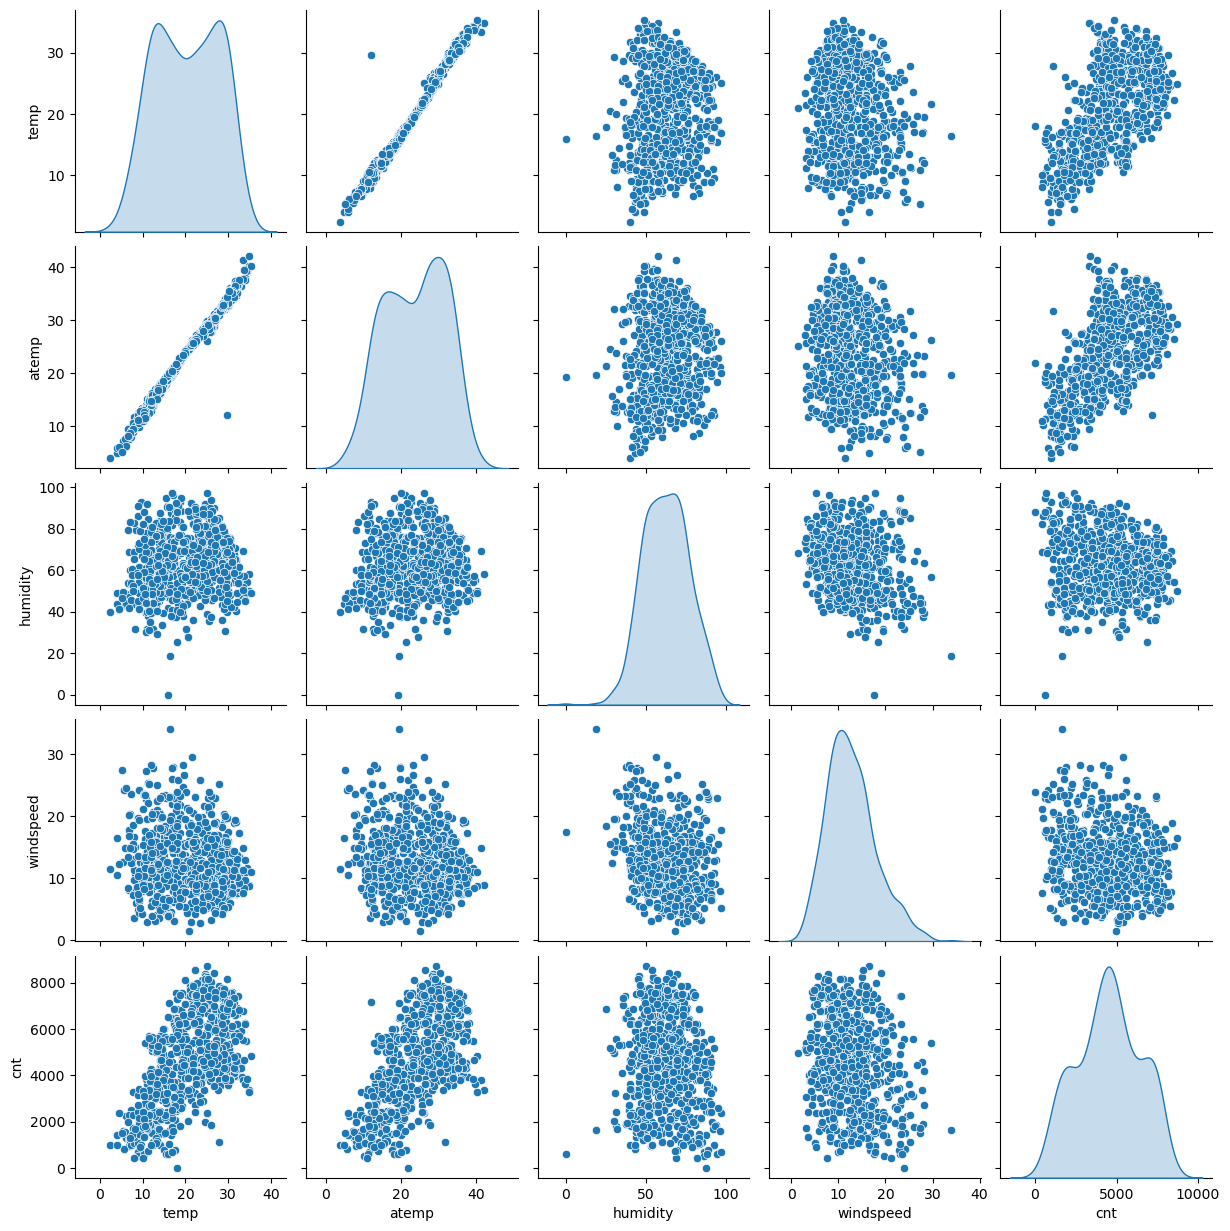

In [1799]:
# Create a new dataframe of only numeric variables:
bike_num=bike_sharing[[ 'temp', 'atemp', 'humidity', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

### Visualising Catagorical Variables

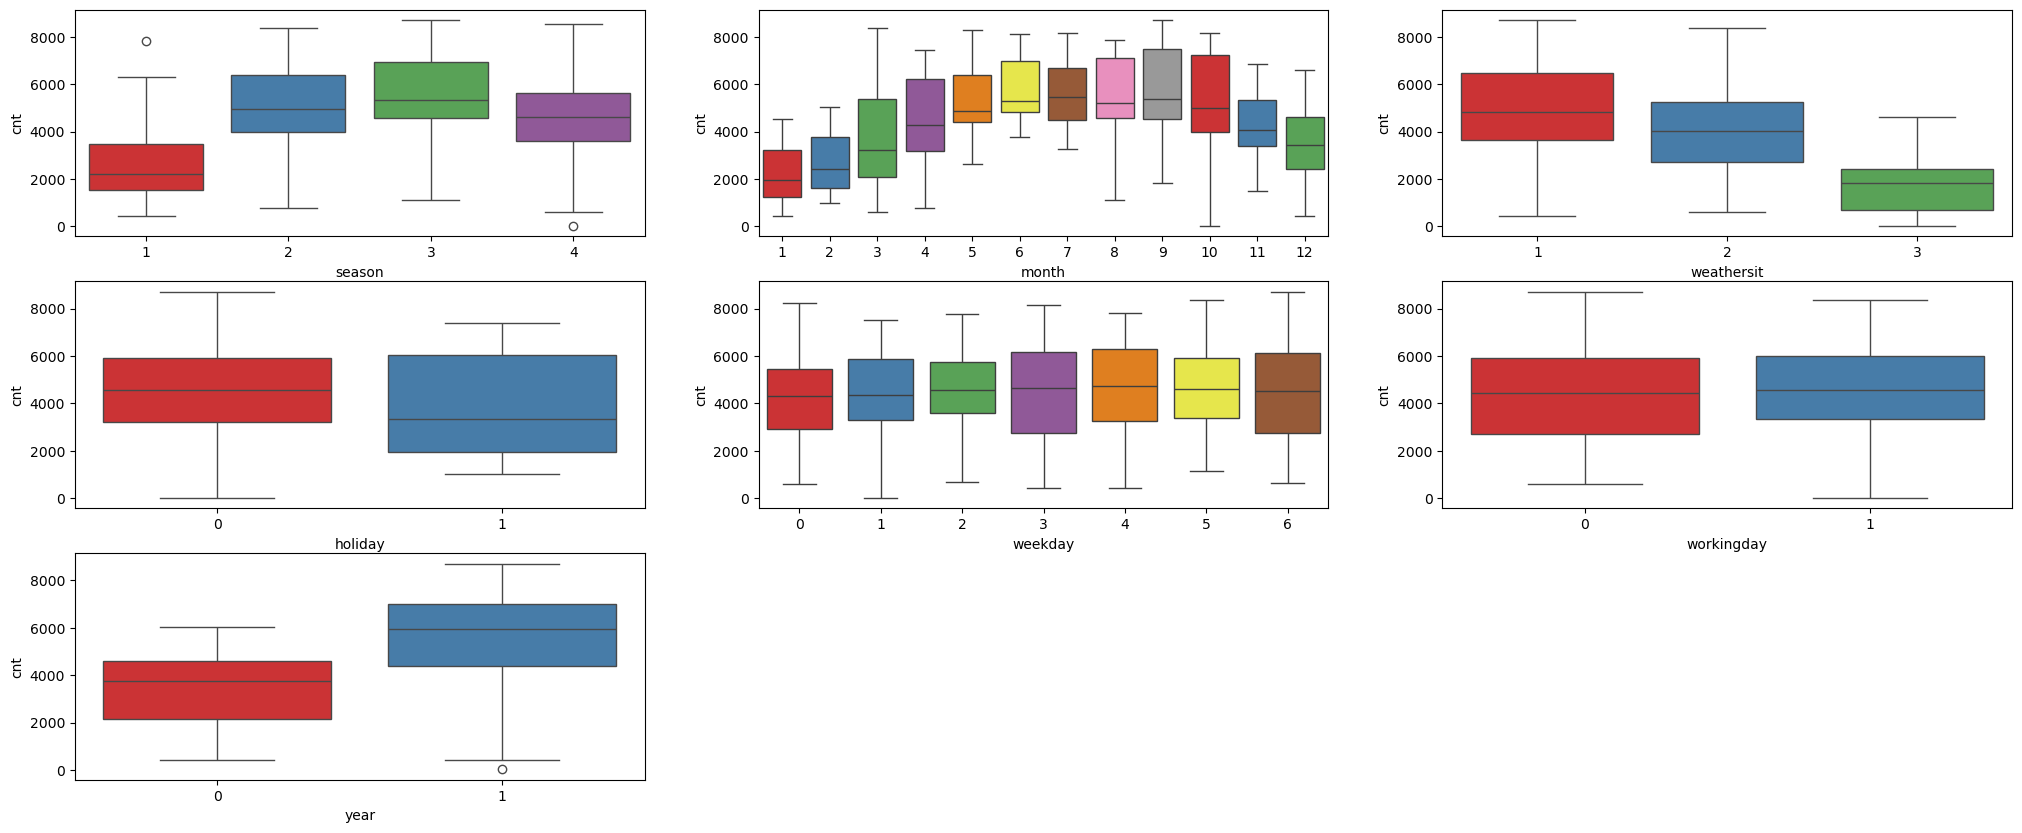

In [1979]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing, palette="Set1")
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing, palette="Set1")
plt.show()

Insights:

- The dataset included six categorical variables. To investigate their impact on the number of bike bookings ('cnt'), we utilized box plots (refer to the figure above).

- Key findings:
    - Season: Season 3 exhibited the highest booking activity, accounting for nearly 32% of all bookings, with a median exceeding 5000. Seasons 2 and 4 followed, suggesting seasonality as a strong predictor for bike bookings.
    - Month: Months 5-9 collectively comprised approximately 10% of the bookings, with a median exceeding 4000 bookings per month, indicating a potential monthly trend that could influence booking patterns.
    - Weather: 'Weathersit1' accounted for roughly 67% of bookings with a median near 5000, followed by 'weathersit2' at 30%. This suggests that weather conditions significantly impact bike usage.
    - Holiday: The data was heavily skewed towards non-holiday periods, with holidays representing only 2.4% of bookings. This bias limits the predictive power of the 'holiday' variable.
    - Weekday: Weekday bookings were relatively evenly distributed across all days (13.5% to 14.8%), with median bookings ranging from 4000 to 5000. The influence of 'weekday' on bookings appears minimal and will be further evaluated during model building.
    - Workingday: 'Workingday' accounted for approximately 69% of bookings, with a median near 5000, suggesting a potential correlation between working days and increased bike usage.

### Correlation Matrix

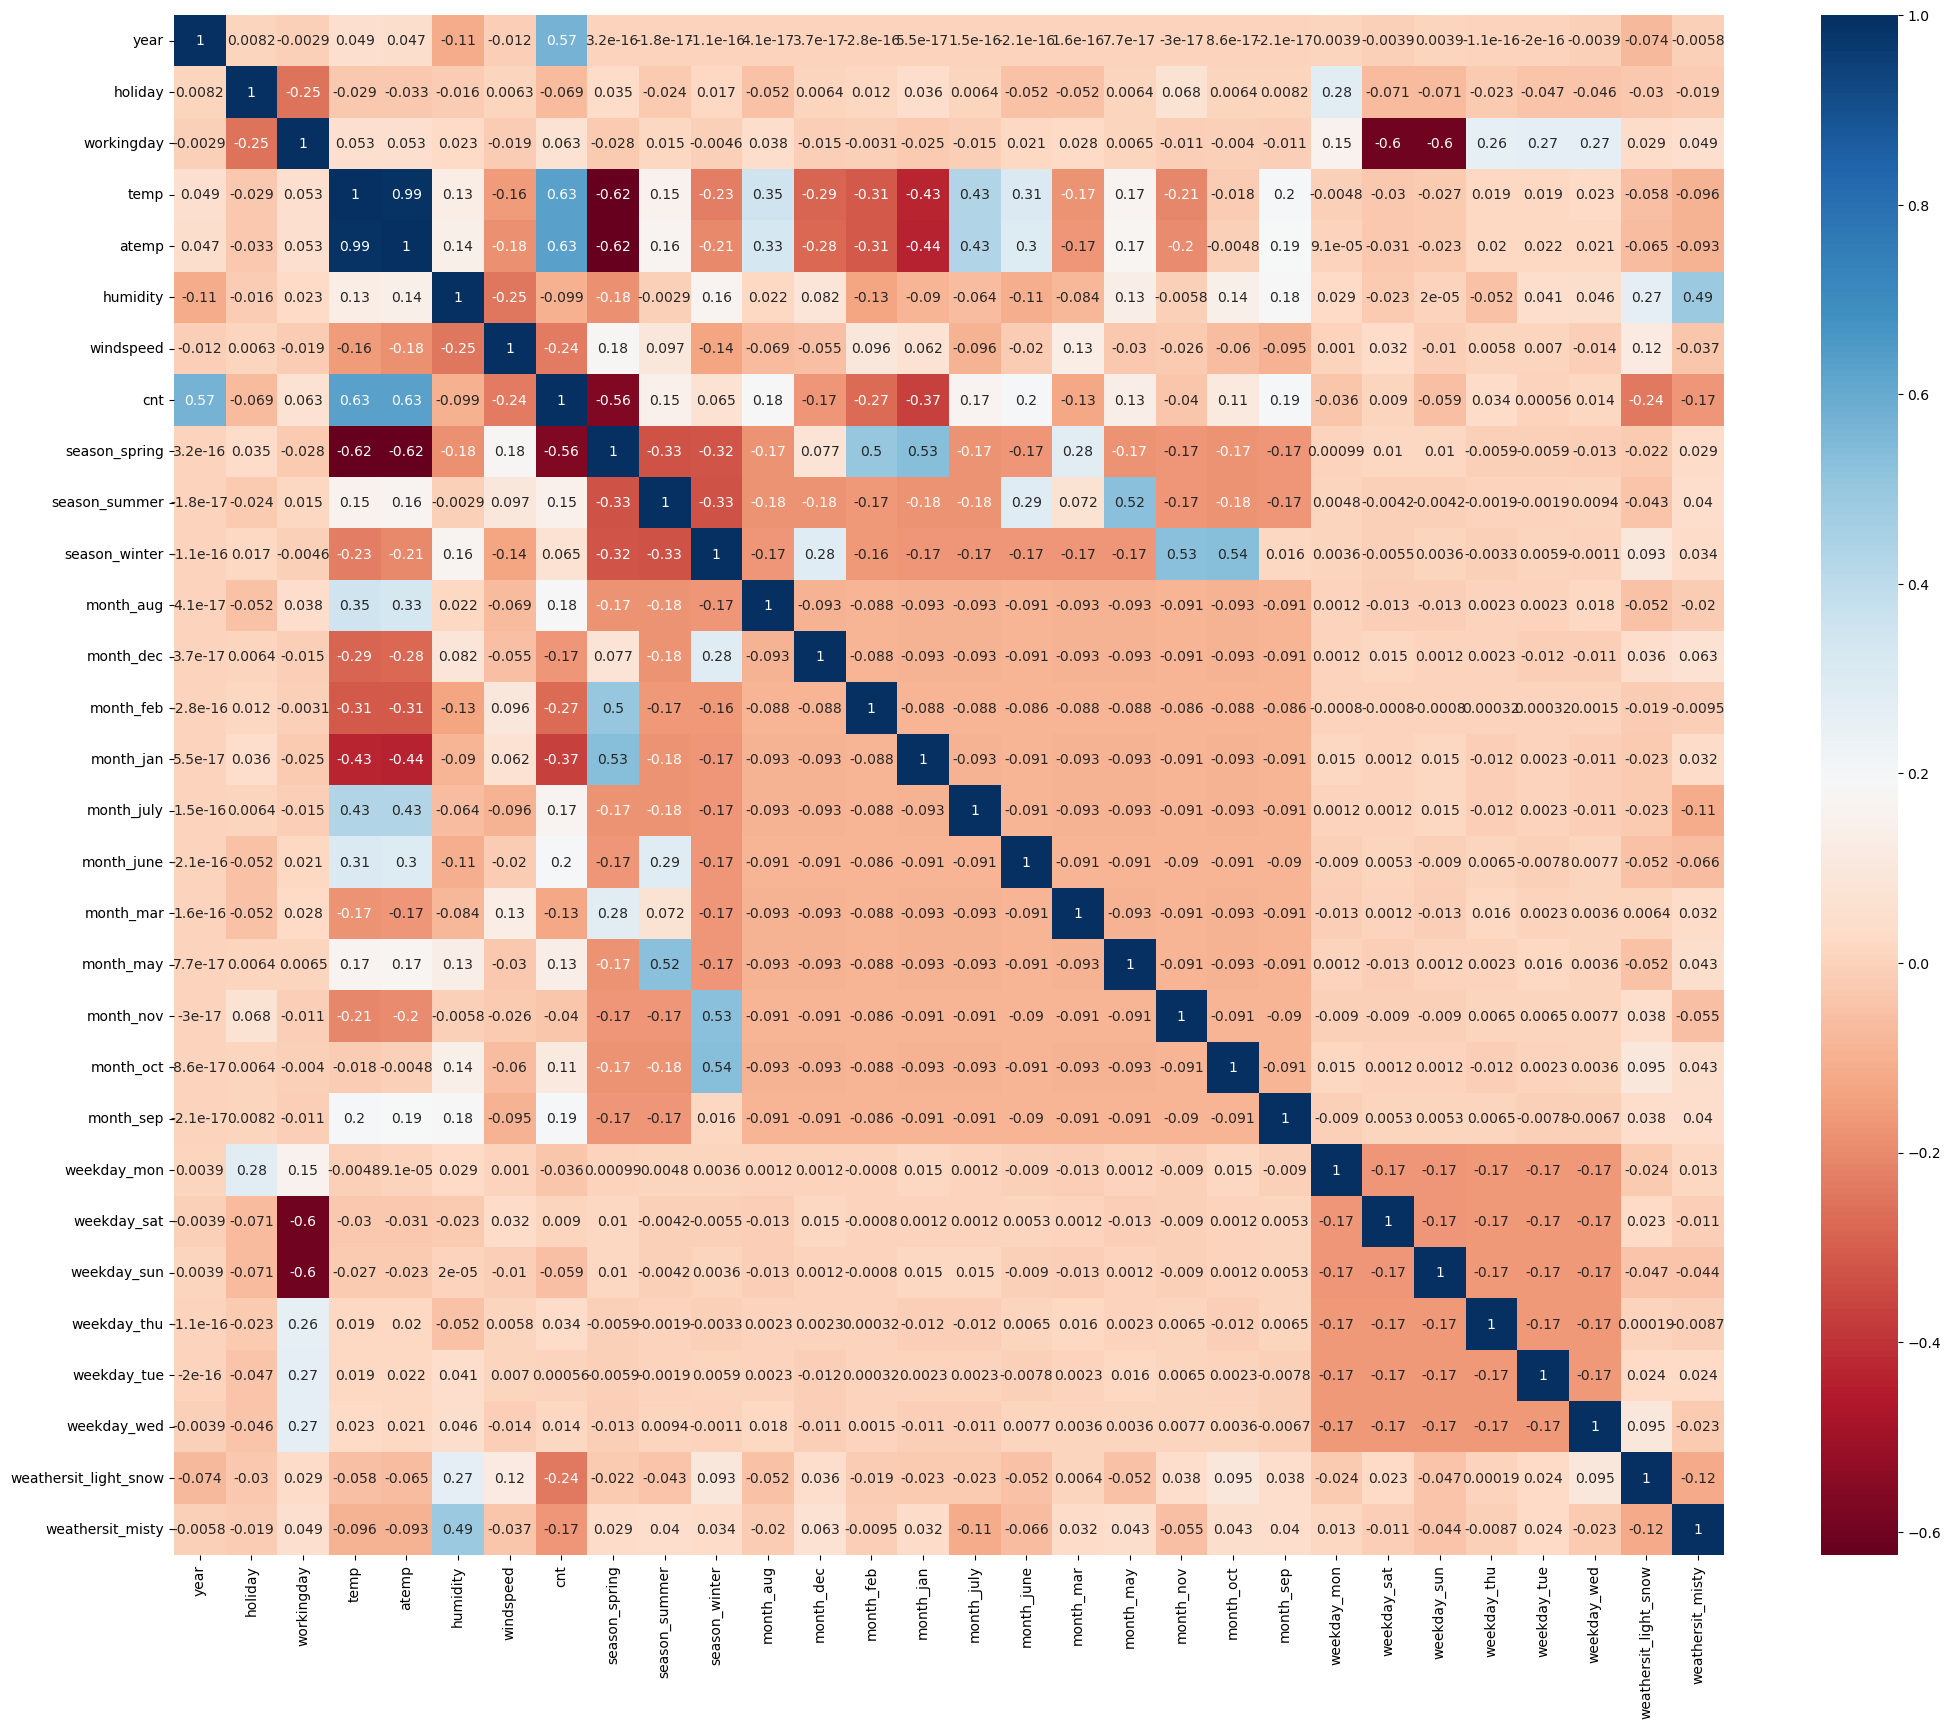

In [1805]:
# Let's check the correlation to see which variables are highly correlated.
plt.figure(figsize = (25,20))
sns.heatmap(new_bike.corr(), annot = True, cmap="RdBu")
plt.show()

Insights:
- The heatmap provides a visual overview of variable relationships, enabling us to identify potential multicollinearity between predictors and assess the strength of relationships between each variable and the target variable. This visual analysis will guide our feature selection process.
- The heatmap will serve as a valuable guide during our model-building process. By iteratively referring to the heatmap in conjunction with VIF and p-value analysis, we can make informed decisions about variable selection and elimination, effectively addressing potential multicollinearity issues.

# Step 4: Splitting the Data
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)- 
We will use train_test_split method from sklearn package for this

In [1808]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.70, random_state = 333)

In [1809]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 650 to 419
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   atemp                  510 non-null    float64
 5   humidity               510 non-null    float64
 6   windspeed              510 non-null    float64
 7   cnt                    510 non-null    int64  
 8   season_spring          510 non-null    int64  
 9   season_summer          510 non-null    int64  
 10  season_winter          510 non-null    int64  
 11  month_aug              510 non-null    int64  
 12  month_dec              510 non-null    int64  
 13  month_feb              510 non-null    int64  
 14  month_jan              510 non-null    int64  
 15  month_jul

In [1810]:
bike_train.shape

(510, 30)

bike_test.info()

In [1812]:
bike_test.shape

(220, 30)

In [1813]:
bike_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_light_snow',
       'weathersit_misty'],
      dtype='object')

# Step 5: RESCALING THE FEATURES

In [1815]:
scaler = MinMaxScaler()
# Checking the values before scaling
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1816]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [1817]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1818]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,0.540777,0.515530,0.647696,0.346806,0.514508,0.250980,0.245098,...,0.084314,0.082353,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980,0.025490,0.343137
std,0.500487,0.151726,0.465245,0.227939,0.213652,0.149805,0.160182,0.224150,0.434003,0.430568,...,0.278131,0.275172,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381,0.157763,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 6: BUILDING A LINEAR MODEL

In [1820]:
#Dividing into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

### RFE

In [1822]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1823]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 3),
 ('month_dec', False, 7),
 ('month_feb', False, 10),
 ('month_jan', False, 8),
 ('month_july', False, 14),
 ('month_june', False, 15),
 ('month_mar', True, 1),
 ('month_may', False, 2),
 ('month_nov', False, 6),
 ('month_oct', True, 1),
 ('month_sep', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', False, 4),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_light_snow', True, 1),
 ('weathersit_misty', True, 1)]

In [1824]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_mar',
       'month_oct', 'month_sep', 'weekday_sun', 'weathersit_light_snow',
       'weathersit_misty'],
      dtype='object')

In [1825]:
X_train.columns[~rfe.support_]

Index(['workingday', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_may', 'month_nov', 'weekday_mon',
       'weekday_sat', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [1826]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'


### Model 1
### VIF Check

In [1829]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,374.28
3,atemp,364.61
4,humidity,26.64
5,windspeed,5.79
6,season_spring,4.19
8,season_winter,3.75
7,season_summer,2.52
14,weathersit_misty,2.29
0,year,2.07
10,month_oct,1.64


In [1830]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [1831]:
# Check the parameters obtained
lr1.params

const                    0.318581
year                     0.228506
holiday                 -0.054101
temp                     0.432167
atemp                    0.058976
humidity                -0.178200
windspeed               -0.182306
season_spring           -0.080064
season_summer            0.049681
season_winter            0.073526
month_mar                0.046502
month_oct                0.054765
month_sep                0.100116
weekday_sun             -0.042468
weathersit_light_snow   -0.271910
weathersit_misty        -0.047693
dtype: float64

In [1832]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.44e-186
Time:                        11:40:39   Log-Likelihood:                 508.88
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     494   BIC:                            -918.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

### Model 2
- Removing the variable 'atemp' based on its High p-value & High VIF

In [1834]:
X_train_new1 = X_train_rfe.drop(["atemp"], axis = 1)

In [1835]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,26.59
2,temp,14.72
4,windspeed,5.53
5,season_spring,4.11
7,season_winter,3.63
6,season_summer,2.42
13,weathersit_misty,2.28
0,year,2.07
9,month_oct,1.64
10,month_sep,1.29


In [1836]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1837]:
# Check the parameters obtained
lr2.params

const                    0.318496
year                     0.228499
holiday                 -0.054470
temp                     0.487909
humidity                -0.177613
windspeed               -0.184567
season_spring           -0.079096
season_summer            0.050747
season_winter            0.074738
month_mar                0.046627
month_oct                0.054837
month_sep                0.100121
weekday_sun             -0.042416
weathersit_light_snow   -0.272279
weathersit_misty        -0.047839
dtype: float64

In [1838]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.92e-187
Time:                        11:40:39   Log-Likelihood:                 508.79
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     495   BIC:                            -924.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

### Model 3
- Removing the variable 'humidity' based on its Very High 'VIF' value.
- Given the likely significant impact of temperature on bike rentals, we decided to retain 'temp' in the model while dropping 'hum' to address potential multicollinearity.

In [1840]:
X_train_new2 = X_train_new1.drop(["humidity"], axis = 1)

In [1841]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.51
2,temp,4.34
4,season_spring,2.27
6,season_winter,2.20
0,year,2.06
5,season_summer,1.92
8,month_oct,1.63
12,weathersit_misty,1.57
9,month_sep,1.25
7,month_mar,1.22


In [1842]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new2)
# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [1843]:
lr3.params

const                    0.224949
year                     0.232823
holiday                 -0.053402
temp                     0.455250
windspeed               -0.146419
season_spring           -0.088552
season_summer            0.043050
season_winter            0.061922
month_mar                0.054807
month_oct                0.053695
month_sep                0.091519
weekday_sun             -0.044298
weathersit_light_snow   -0.324879
weathersit_misty        -0.077375
dtype: float64

In [1844]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.38e-184
Time:                        11:40:40   Log-Likelihood:                 497.37
No. Observations:                 510   AIC:                            -966.7
Df Residuals:                     496   BIC:                            -907.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

### Model 4
- Removing the variable 'windspeed' based on its Very High 'VIF' value.

In [1846]:
X_train_new3 = X_train_new2.drop(["windspeed"], axis = 1)

In [1847]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.93
0,year,2.05
5,season_winter,1.97
4,season_summer,1.69
7,month_oct,1.61
11,weathersit_misty,1.57
3,season_spring,1.51
8,month_sep,1.25
6,month_mar,1.22
9,weekday_sun,1.17


In [1848]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new3)
# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1849]:
lr4.params

const                    0.167683
year                     0.230621
holiday                 -0.056003
temp                     0.469754
season_spring           -0.092944
season_summer            0.037798
season_winter            0.067370
month_mar                0.054460
month_oct                0.058657
month_sep                0.095971
weekday_sun             -0.045407
weathersit_light_snow   -0.341029
weathersit_misty        -0.075345
dtype: float64

In [1850]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.05e-178
Time:                        11:40:40   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     497   BIC:                            -884.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

### Model 5
- Removing the variable 'holiday' based on its High p-value.

In [1852]:
X_train_new4 = X_train_new3.drop(["holiday"], axis = 1)

In [1853]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.92
0,year,2.04
4,season_winter,1.96
3,season_summer,1.69
6,month_oct,1.61
10,weathersit_misty,1.57
2,season_spring,1.50
7,month_sep,1.25
5,month_mar,1.22
8,weekday_sun,1.16


In [1854]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)
# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [1855]:
lr5.params

const                    0.167919
year                     0.229885
temp                     0.467999
season_spring           -0.094346
season_summer            0.037418
season_winter            0.065489
month_mar                0.055843
month_oct                0.058370
month_sep                0.097326
weekday_sun             -0.043826
weathersit_light_snow   -0.339617
weathersit_misty        -0.074740
dtype: float64

In [1856]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.10e-179
Time:                        11:40:40   Log-Likelihood:                 480.47
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     498   BIC:                            -886.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


# Step 7: Residual Analysis of the train data

In [1859]:
y_train_m5 = lr5.predict(X_train_lm5)

In [1860]:
train_r2 = round(r2_score(y_train, y_train_m5),3)
print("Train R^2:",r2)

Train R^2: 0.819


In [1967]:
train_adjusted_r2 = round(1-(1-train_r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print("Train Adjusted r^2:",adjusted_r2)

Train Adjusted r^2: 0.791


Text(0.5, 0, 'Errors')

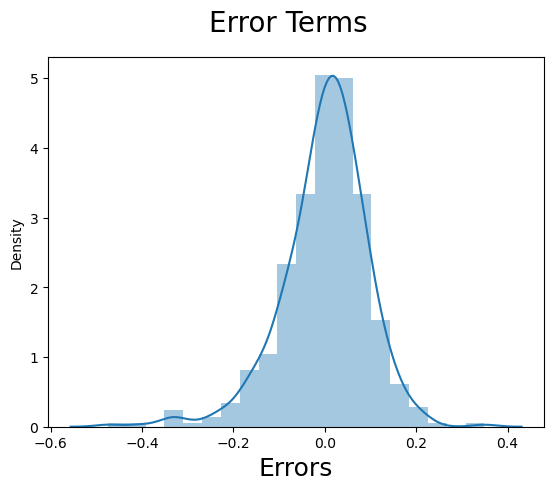

In [1862]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_m5), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Errors', fontsize = 18)

Insights
- The observation that the error terms are centered around 0 and appear to follow a normal distribution is crucial, as it validates one of the key assumptions of linear regression..


# Step 8: Making Predictions Using the Final Model

In [1865]:
# Applying the scaling on the test sets
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [1866]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.086364,0.081818,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182,0.036364,0.322727
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.281541,0.274713,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559,0.187620,0.468586
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1867]:
# Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [1868]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [1869]:
X_test_m5.columns 

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_light_snow',
       'weathersit_misty'],
      dtype='object')

In [1870]:
# Creating X_test_m5 dataframe by dropping variables from X_test_m4
drop=["workingday", "month_aug", "month_dec", "month_feb", "month_jan", "month_july", "month_june", "month_may", "month_nov", "weekday_mon", "weekday_sat", "weekday_thu", "weekday_tue", "weekday_wed", "holiday", "windspeed", "humidity", "atemp"]
X_test_m5 = X_test_m5.drop(drop, axis = 1)

In [1871]:
# Making predictions using the fifth model
y_pred_m5 = lr5.predict(X_test_m5)

In [1872]:
r2 = round(r2_score(y_test, y_pred_m5),3)
print("Test R^2:",r2)

Test R^2: 0.819


# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

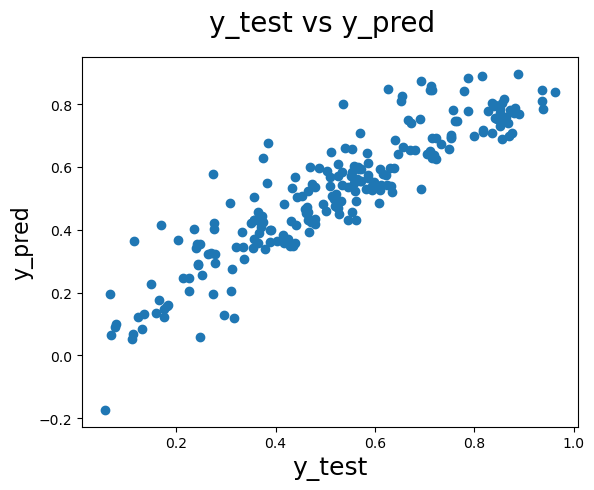

In [1874]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
# Plot heading
fig.suptitle('y_test vs y_pred', fontsize = 20)
# X-label
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      

In [1875]:
round(lr5.params,4)

const                    0.1679
year                     0.2299
temp                     0.4680
season_spring           -0.0943
season_summer            0.0374
season_winter            0.0655
month_mar                0.0558
month_oct                0.0584
month_sep                0.0973
weekday_sun             -0.0438
weathersit_light_snow   -0.3396
weathersit_misty        -0.0747
dtype: float64

The equation of the best-fit line is determined to be:
*cnt = 0.1679 + 0.2299 x year + 0.4680 x 
tem - 0.0943 x 
season_sprin+ 0.0374 x 3
season_sum + 0.0655 x 74
seasonter + 0.0558 x 655
mont + 0.0584 x 0558
mon + 0.0973 x .0584
mo - 0.0438 x 0.0973
wee - 0.3396 x -0.0438
weathersit_l*  -0.3396

In [1965]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print("Test Adjusted r^2:",adjusted_r2)

Test Adjusted r^2: 0.791


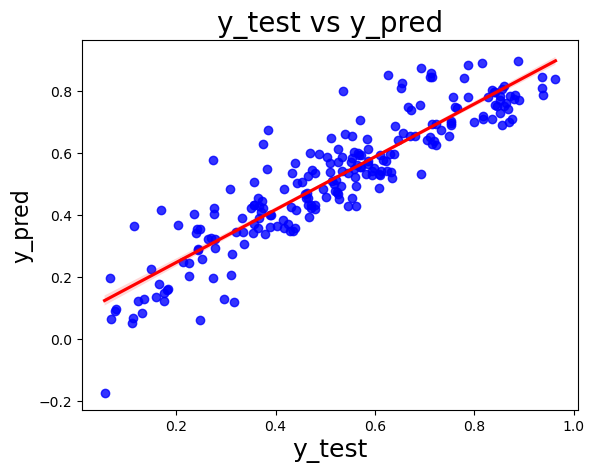

In [1878]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred_m5, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Final Result Comparison:

| Index | Score |
|-------|---------|
| Train R^2 | 0.819 |
| Train Adjusted R^2 | 0.791 |
| Test R^2 | 0.819 |
| Test Adjusted R^2 | 0.791 |

The model demonstrates excellent performance with high R-squared values for both the training and test sets. The consistent R-squared and Adjusted R-squared values (approximately 0.819 and 0.791, respectively) suggest a robust model that generalizes well to unseen data.